# –û—Ç—á–µ—Ç –ø–æ –º–æ–¥–µ–ª–∏ —Å –ø—Ä–æ–±–∏—Ç–∏–µ–º baseline

–°—Ç–∞—Ç–∫–µ–≤–∏—á –ï–∫–∞—Ç–µ—Ä–∏–Ω–∞

In [3]:
import numpy as np
import pandas as pd

import random
from typing import Optional
import lightgbm
from lightgbm.callback import early_stopping
import matplotlib.pyplot as plt

# –ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –∑–∞–¥–∞—á–∏

–ë—ã–ª–∞ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∞ –º–æ–¥–µ–ª—å lightgbm, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–∞–≤–∞–ª–∞ —Å–∫–æ—Ä 0.12812 (Public Leaderboard)

–¶–µ–ª—å - –ø—Ä–æ–≤–µ—Å—Ç–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ, –≤ —Ö–æ–¥–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –ø–æ–ª—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –¥–∞—é—â—É—é –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

# 1. –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–°–Ω–∞—á–∞–ª–∞ –ø–æ–¥–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∏—Ö

In [12]:
!python3 -m pip install pyarrow

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25.0/25.0 MB 3.4 MB/s eta 0:00:0000:0100:01


In [4]:
train = pd.read_parquet('Downloads/items_train.pq')
train.head(10)

item_id  category_id  request_id  rank  model_a_score  model_a_rank  \
243499   153904            2           0   199            NaN           NaN   
243444   426282            2           0   144            NaN           NaN   
243491   692087            2           0   191            NaN           NaN   
243448   825959            2           0   148          11.11          16.0   
243548   911885           25           0   248            NaN           NaN   
243369  1108209            5           0    69            NaN           NaN   
243490  1471158            2           0   190          10.54          20.0   
243572  1703717            2           0   272            NaN           NaN   
243492  1764802           25           0   192            NaN           NaN   
243431  1818376            2           0   131            NaN           NaN   

        model_b_score  model_b_rank  model_b_f1  model_b_f2  ...  \
243499            NaN           NaN         NaN         NaN  ...   
243444            NaN           NaN         NaN         NaN  ...   
243491            NaN           NaN         NaN         NaN  ...   
243448            NaN           NaN         NaN         NaN  ...   
243548            NaN           NaN         NaN         NaN  ...   
243369            NaN           NaN         NaN         NaN  ...   
243490            NaN           NaN         NaN         NaN  ...   
243572            NaN           NaN         NaN         NaN  ...   
243492            NaN           NaN         NaN         NaN  ...   
243431            NaN           NaN         NaN         NaN  ...   

        item_stats.clicks  item_stats.clicks_rec  item_stats.last_clicks  \
243499                201                    157                       9   
243444                949                    511                      31   
243491               1154                    692                      84   
243448                332                    183                      14   
243548               3026                   1890                      95   
243369                523                    344                      33   
243490                113                     72                       8   
243572                184                    120                       5   
243492                373                    197                      54   
243431                104                     70                      15   

        item_stats.long_clicks  item_stats.clicks_last_day  \
243499               32.870800                          26   
243444              101.482094                          60   
243491              160.471603                         128   
243448               34.140823                          23   
243548              475.407562                         153   
243369               90.693459                           9   
243490                9.300191                          16   
243572               12.099404                           5   
243492               38.809532                         242   
243431                9.505854                          31   

        item_stats.clicks_rec_last_day  item_stats.segment_contact_conversion  \
243499                              17                               0.026808   
243444                              46                               0.020660   
243491                              85                               0.023634   
243448                              10                               0.008888   
243548                              94                               0.002561   
243369                               3                               0.023328   
243490                              14                               0.027922   
243572                               1                               0.030179   
243492                             152                               0.002299   
243431                              28                     

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞–∑–º–µ—Ä —Å–∞–º–∏—Ö –¥–∞–Ω–Ω—ã—Ö

In [18]:
train.shape

(40623600, 49)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40623600 entries, 243499 to 1017236
Data columns (total 49 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   item_id                                int64  
 1   category_id                            int64  
 2   request_id                             int64  
 3   rank                                   int64  
 4   model_a_score                          float64
 5   model_a_rank                           float64
 6   model_b_score                          float64
 7   model_b_rank                           float64
 8   model_b_f1                             float64
 9   model_b_f2                             float64
 10  model_b_f3                             float64
 11  model_c_score                          float64
 12  model_c_rank                           float64
 13  model_d_score                          float64
 14  model_d_rank                           float

–£–∂–µ –≤–∏–¥–Ω–æ, —á—Ç–æ —Ö–æ—Ç—è –±—ã –Ω–µ—Ç—É –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –¢–µ–ø–µ—Ä—å –∏–∑—É—á–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–æ–ø—É—Å–∫–∏

In [17]:
train.isna().sum()

item_id                                         0
category_id                                     0
request_id                                      0
rank                                            0
model_a_score                            27723714
model_a_rank                             27723714
model_b_score                            27206522
model_b_rank                             27206522
model_b_f1                               27206522
model_b_f2                               27206522
model_b_f3                               27206522
model_c_score                            16432734
model_c_rank                             16432734
model_d_score                            31038797
model_d_rank                             31038797
shows_count                                     0
microcategory_id                                0
location_id                                     0
price                                     1039193
sort_age                                        0


–ö–∞–∫ –≤–∏–¥–Ω–æ - –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±–æ–ª–µ–µ —á–µ–º –ø–æ–ª–æ–≤–∏–Ω–∞ –¥–∞–Ω–Ω—ã—Ö —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏. –ù–æ —É–¥–∞–ª—è—Ç—å –∏—Ö –Ω–µ —Ö–æ—á–µ—Ç—Å—è. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - –º–æ–∂–µ—Ç –ø–æ–≤–µ–∑–µ—Ç –∏ –æ–Ω–∏ –±—É–¥—É—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—ã?

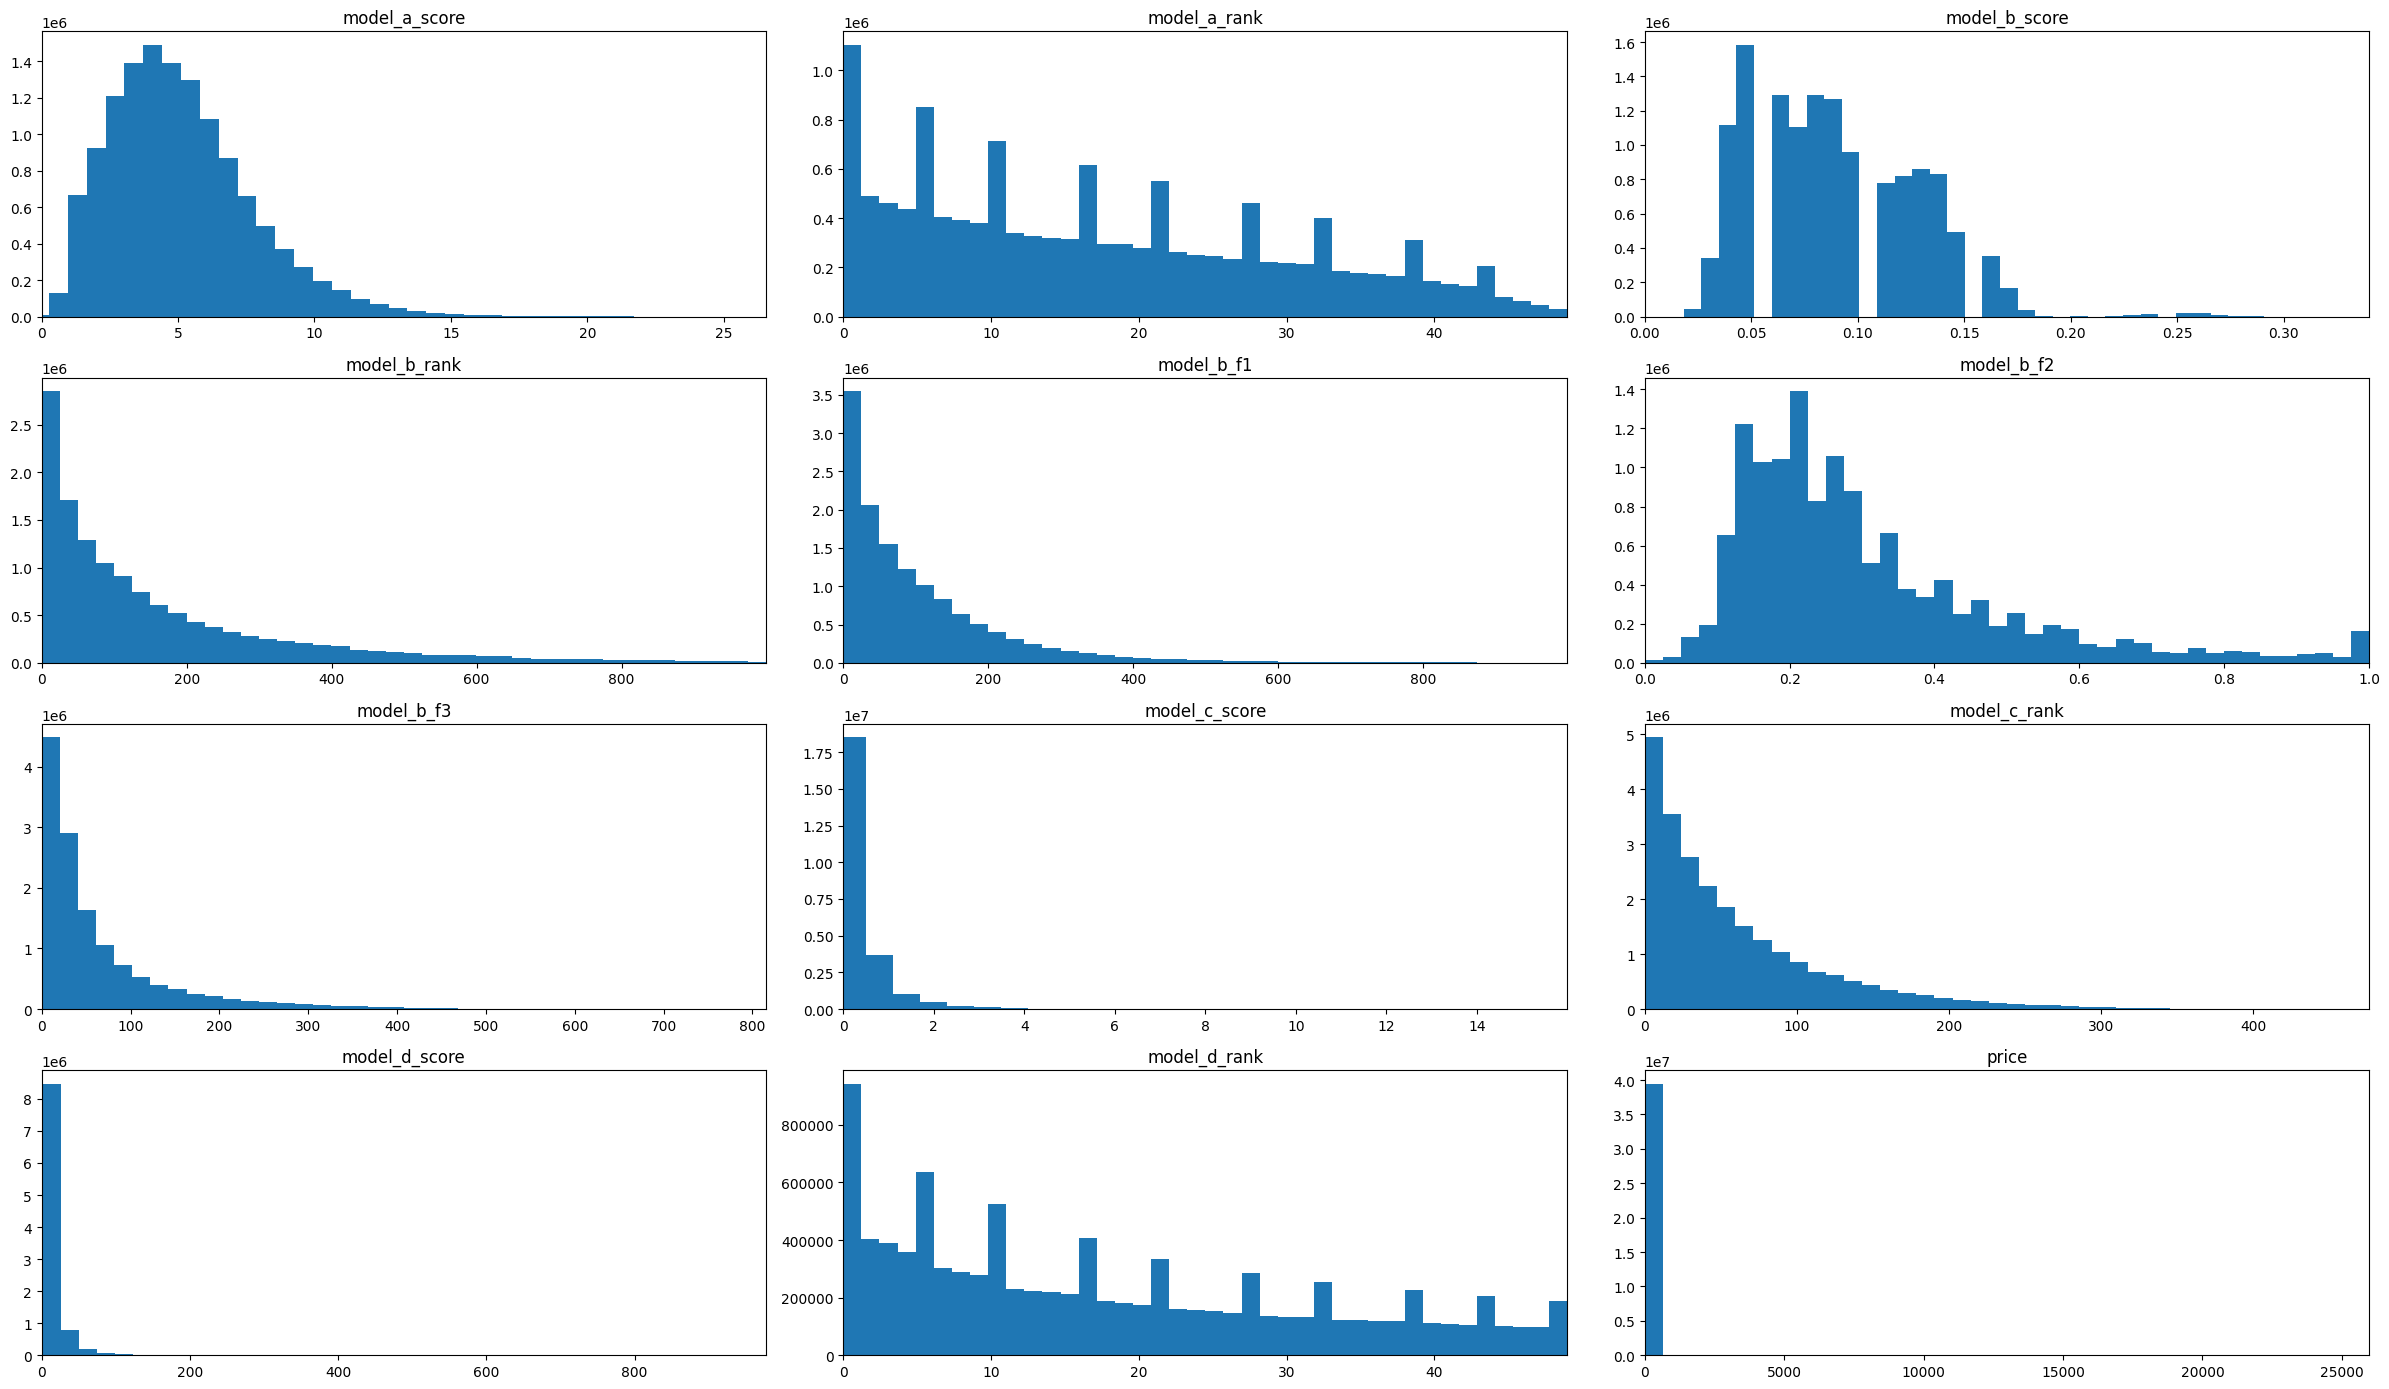

In [25]:
feats = ['model_a_score', 
         'model_a_rank', 
         'model_b_score',
         'model_b_rank', 
         'model_b_f1',
         'model_b_f2',
         'model_b_f3',
         'model_c_score',
         'model_c_rank',
         'model_d_score',
         'model_d_rank',
         'price']

plt.figure(figsize=(24, 14))
for i, f in enumerate(feats):
    plt.subplot(4, 3, i + 1)
    plt.hist(train[f], bins=40)
    plt.title(f)
    plt.xlim((0, np.max(train[f])))
    
plt.tight_layout()

–ö–∞–∂–µ—Ç—Å—è - –º–æ–∂–µ–º –±–µ–∑–±–æ–ª–µ–∑–Ω–µ–Ω–Ω–æ —É–¥–∞–ª–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫ price - –∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –≤—ã–±—Ä–æ—Å–æ–≤ –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã. –¢–∞–∫–∂–µ —Ö–æ—á–µ—Ç—Å—è –∏–∑—É—á–∏—Ç—å –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –æ—Å—Ç–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

<AxesSubplot: >

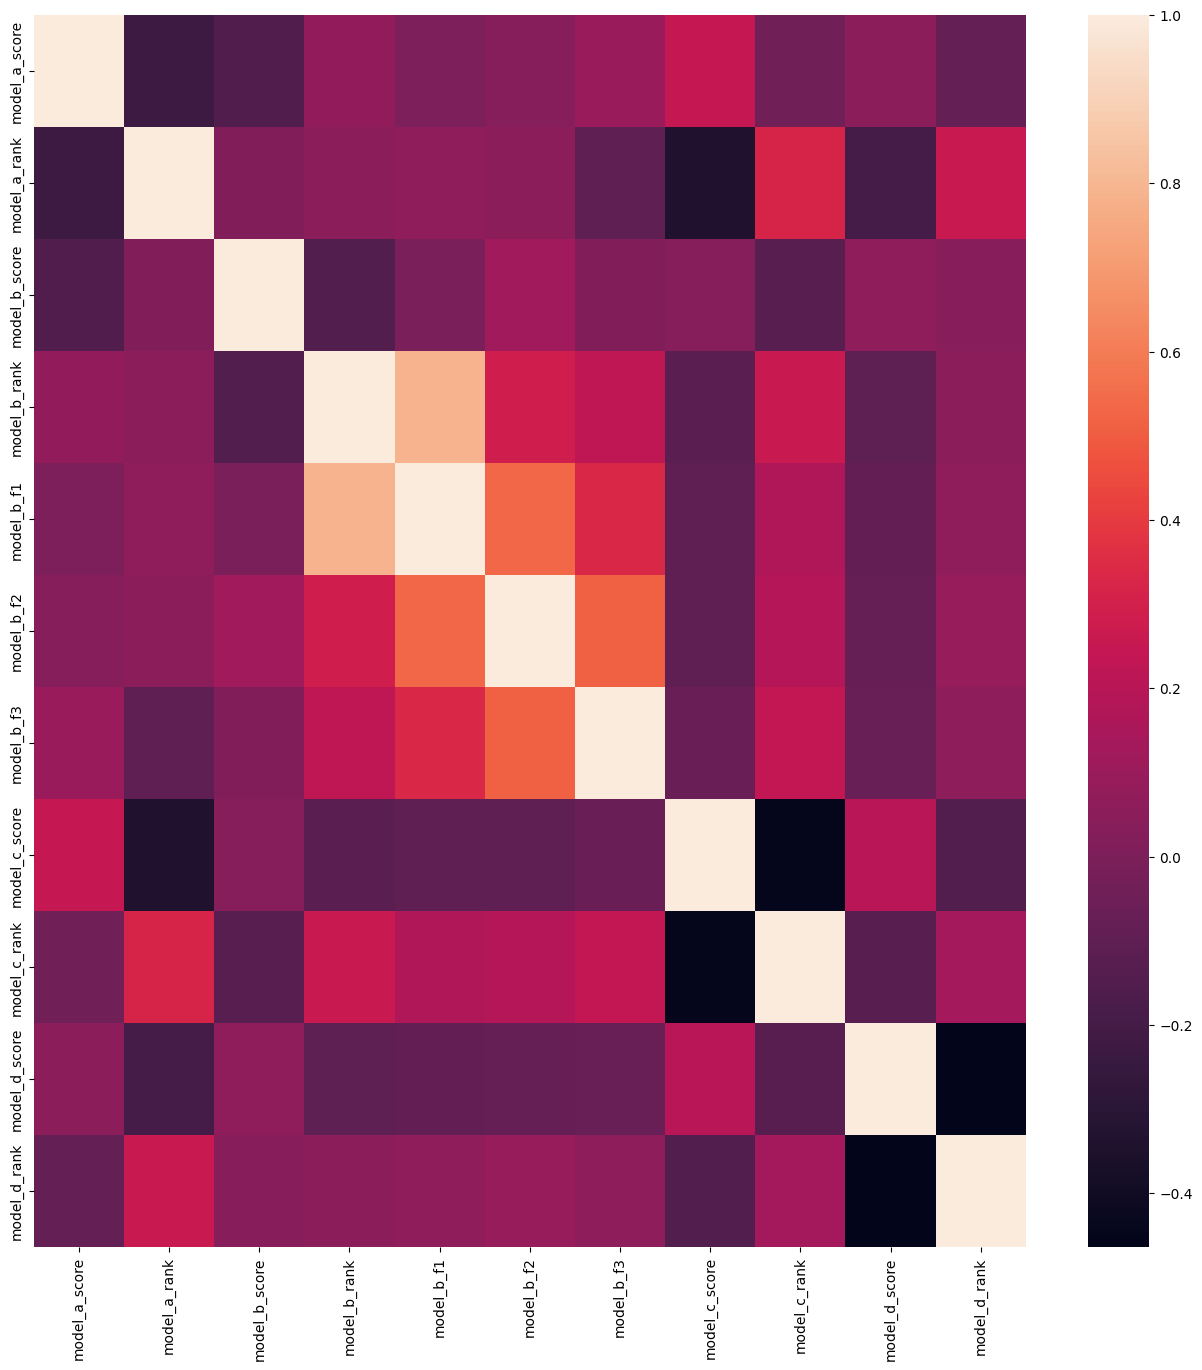

In [27]:
import seaborn as sns

train = train.drop(columns=['price'])
feats = ['model_a_score', 
         'model_a_rank', 
         'model_b_score',
         'model_b_rank', 
         'model_b_f1',
         'model_b_f2',
         'model_b_f3',
         'model_c_score',
         'model_c_rank',
         'model_d_score',
         'model_d_rank']

plt.figure(figsize=(16, 16))
sns.heatmap(train[feats].corr())

–í–∏–¥–Ω–æ —á—Ç–æ 'model_b_rank' –∏ 'model_b_f1' –¥–æ–≤–æ–ª—å–Ω–æ —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç –º–µ–∂–¥—É —Å–æ–±–æ–π - —É–¥–∞–ª–∏–º model_b_f1

In [28]:
train = train.drop(columns=['model_b_f1'])
train.shape

(40623600, 47)

–ü–æ –∏–¥–µ–µ - —Å—Ä–µ–¥–∏ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö (–±–µ–∑ NaN) –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Ç–æ–∂–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –∫—É—á–∞ –µ—Ä—É–Ω–¥—ã. –î–ª—è –Ω–∏—Ö –ø—Ä–æ–≤–µ–¥–µ–º –ø–æ—Ö–æ–∂–µ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ

In [29]:
features1 = [
       'category_id', 'shows_count', 'microcategory_id',
       'location_id', 'sort_age', 'start_age', 'latitude',
       'longitude', 'item_stats.days',
       'item_stats.contact_conversion', 'item_stats.hides', 'item_stats.shows',
]

features2 = [
       'item_stats.shows_last_day', 'item_stats.shows_rec',
       'item_stats.shows_rec_last_day', 'item_stats.contacts',
       'item_stats.contacts_last_day', 'item_stats.contacts_rec_last_day',
       'item_stats.contacts_rec', 'item_stats.last_contacts',
       'item_stats.delayed_contacts', 'item_stats.delayed_contacts_rec',
       'item_stats.clicks', 'item_stats.clicks_rec',
]

features3 = [
       'item_stats.last_clicks',
       'item_stats.long_clicks', 'item_stats.clicks_last_day',
       'item_stats.clicks_rec_last_day',
       'item_stats.segment_contact_conversion',
       'item_stats.seller_contact_conversion',
       'item_stats.segment_click_conversion',
       'item_stats.seller_click_conversion',
]

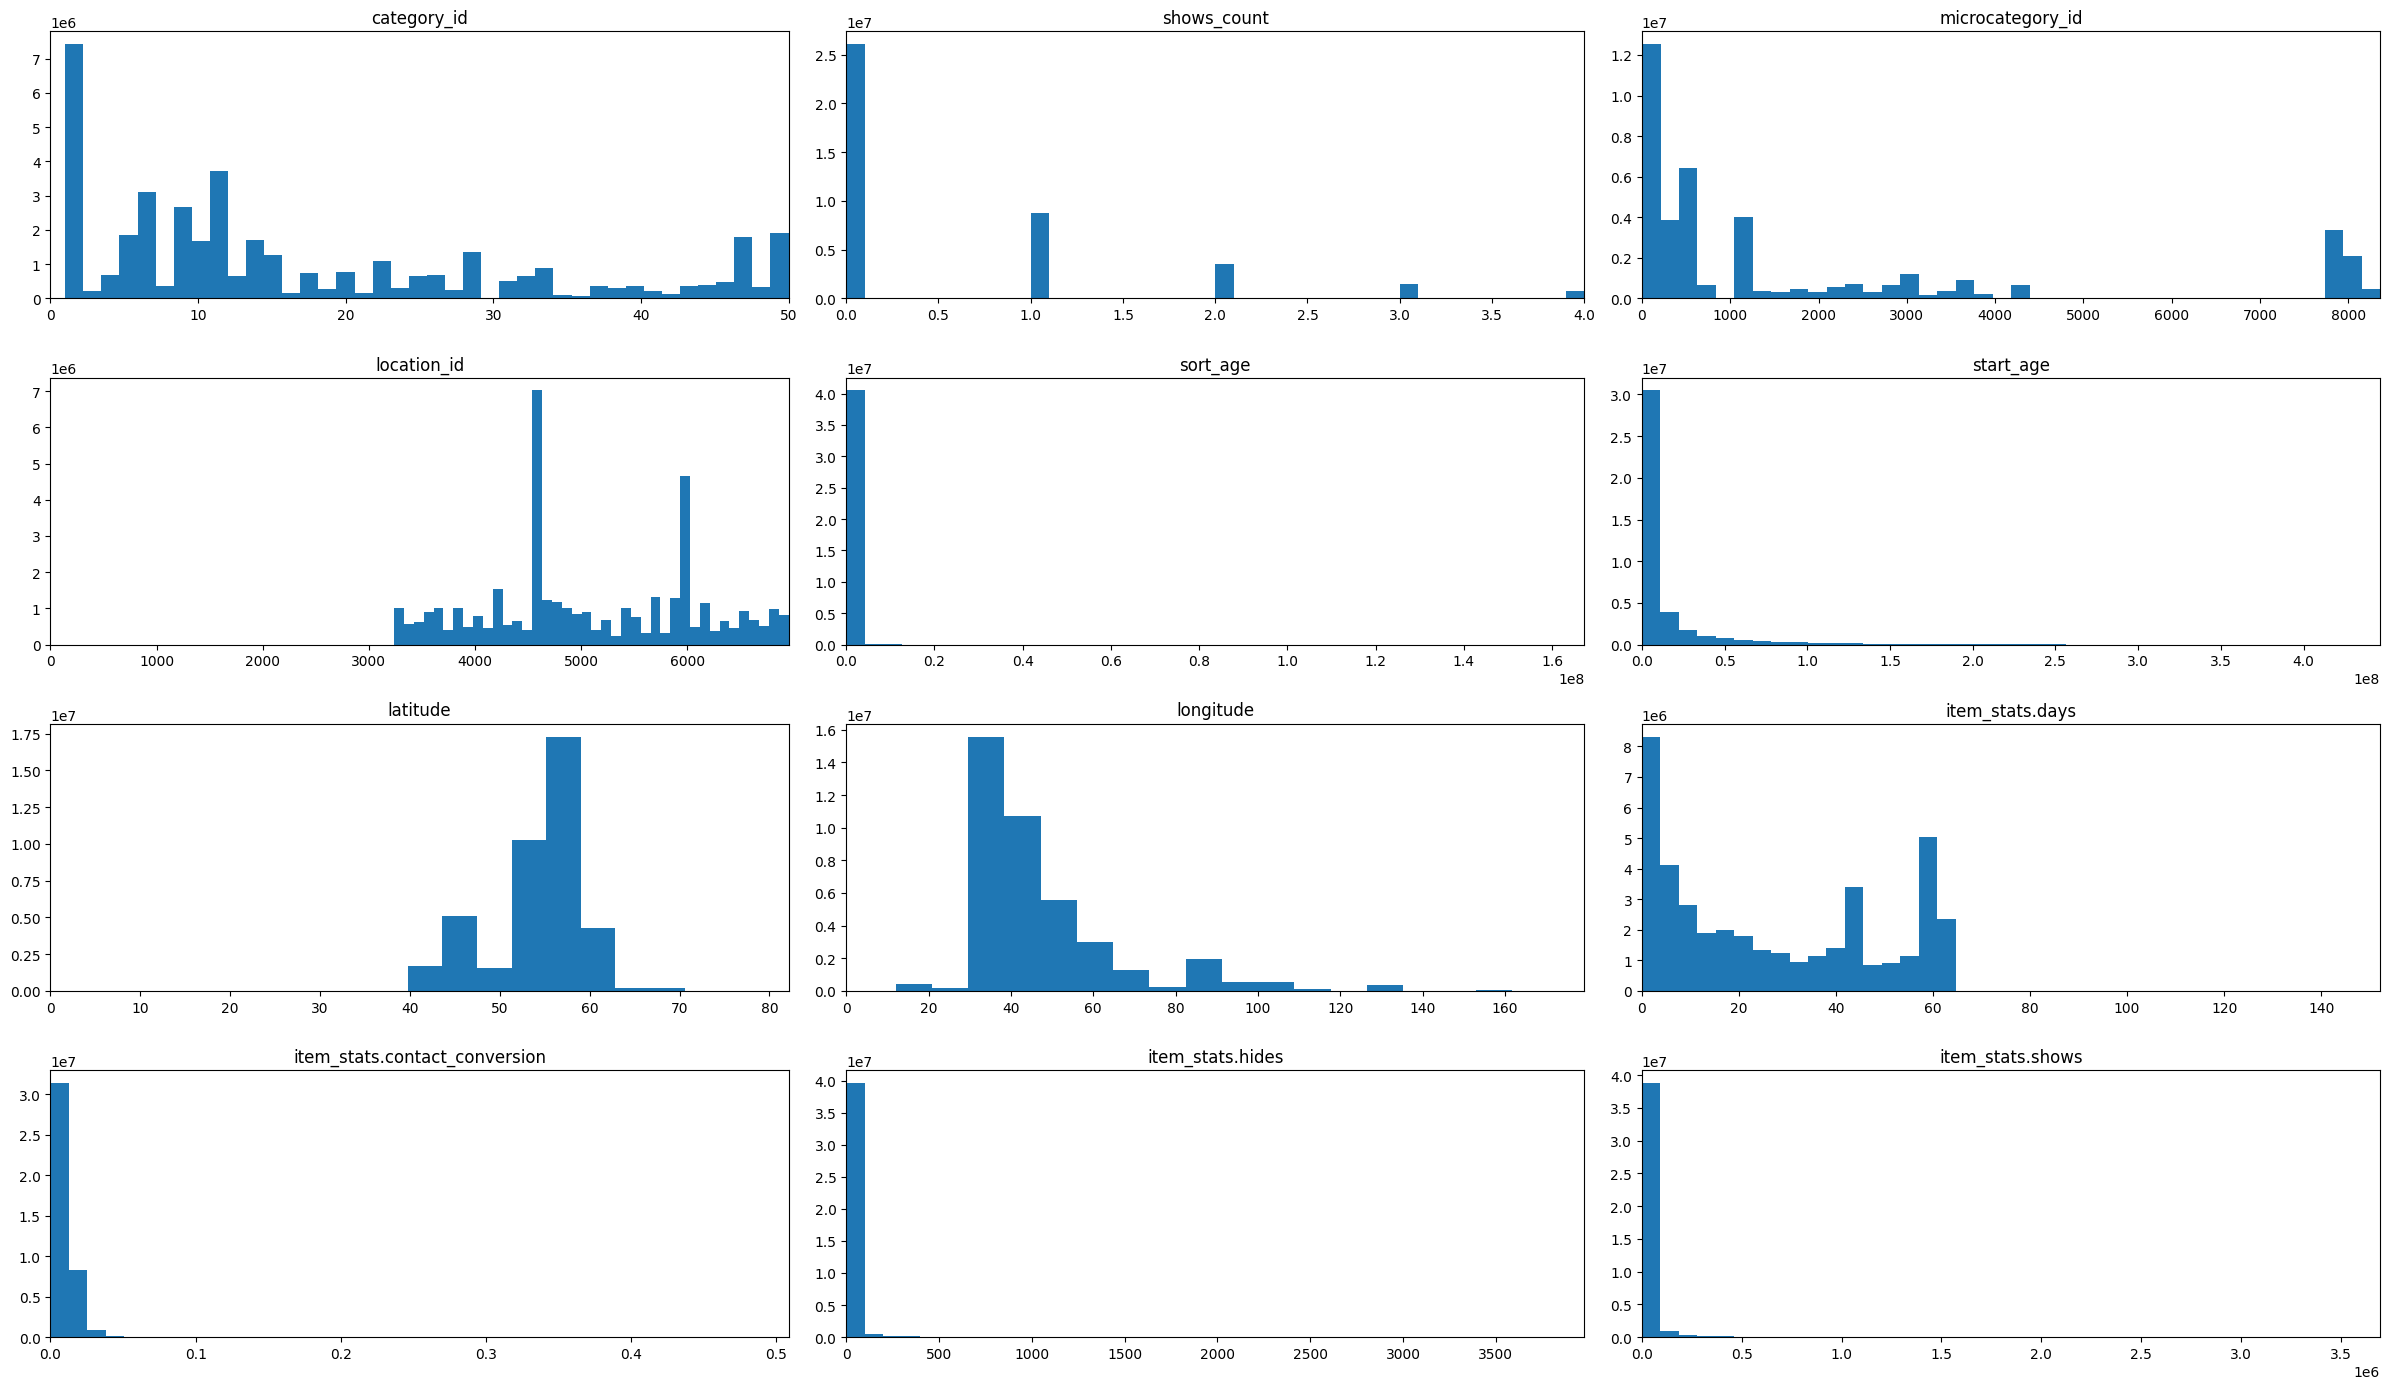

In [30]:
plt.figure(figsize=(24, 14))
for i, f in enumerate(features1):
    plt.subplot(4, 3, i + 1)
    plt.hist(train[f], bins=40)
    plt.title(f)
    plt.xlim((0, np.max(train[f])))
    
plt.tight_layout()

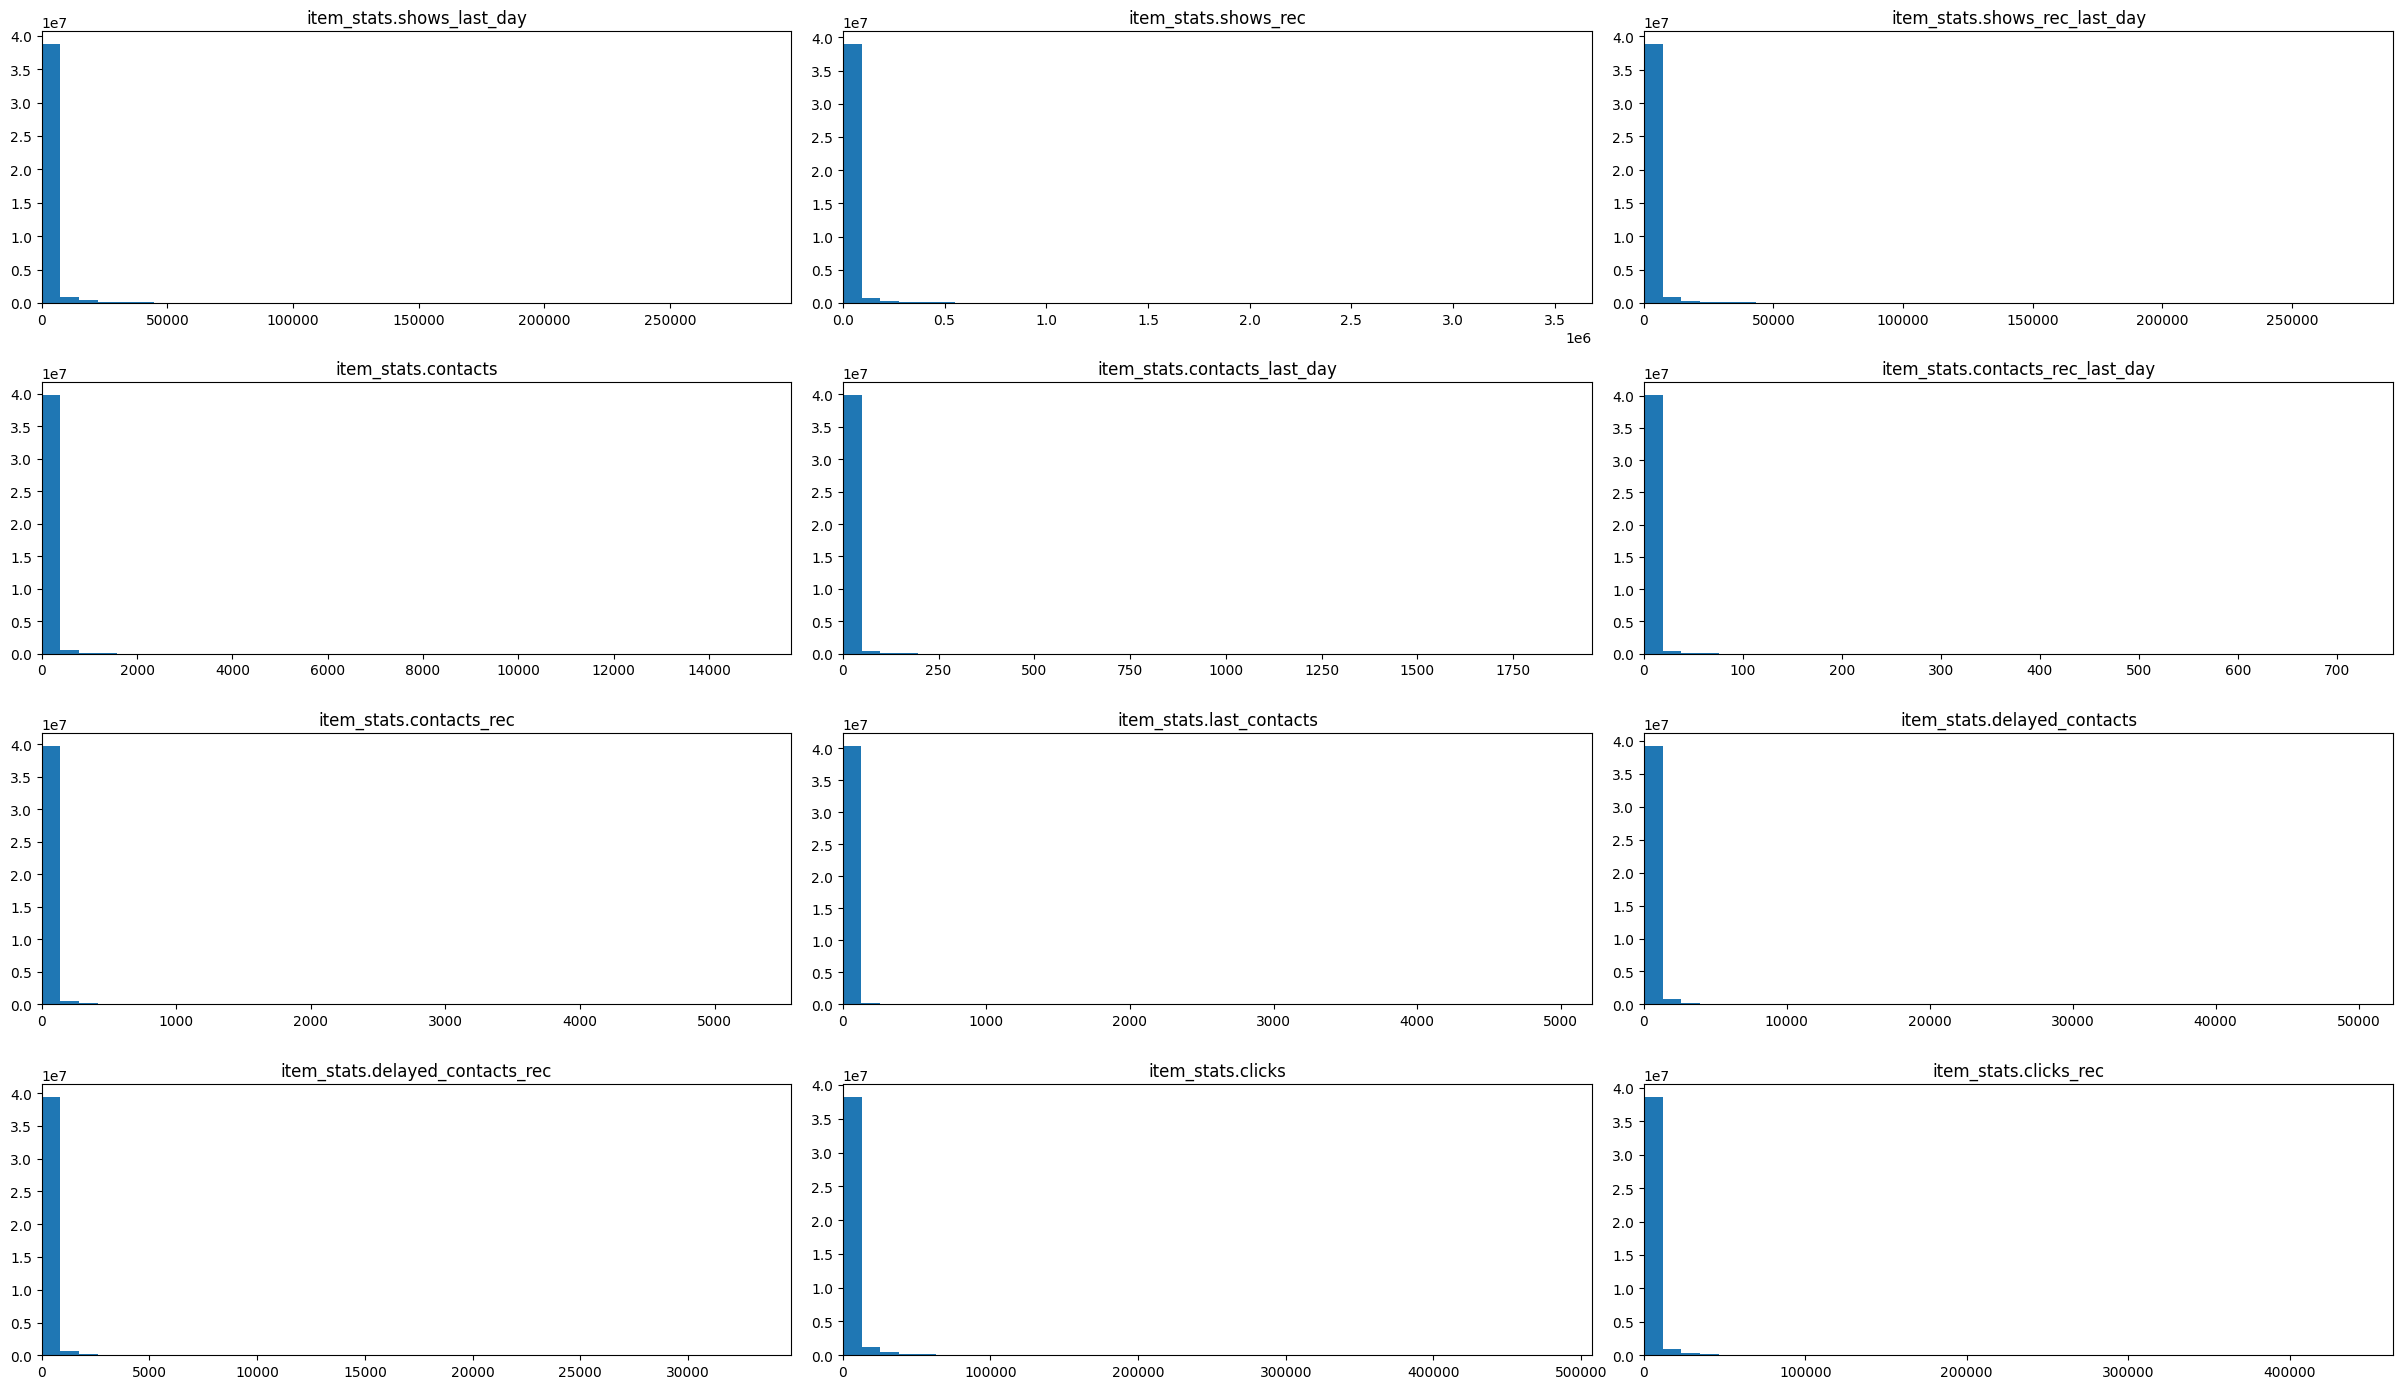

In [31]:
plt.figure(figsize=(24, 14))
for i, f in enumerate(features2):
    plt.subplot(4, 3, i + 1)
    plt.hist(train[f], bins=40)
    plt.title(f)
    plt.xlim((0, np.max(train[f])))
    
plt.tight_layout()

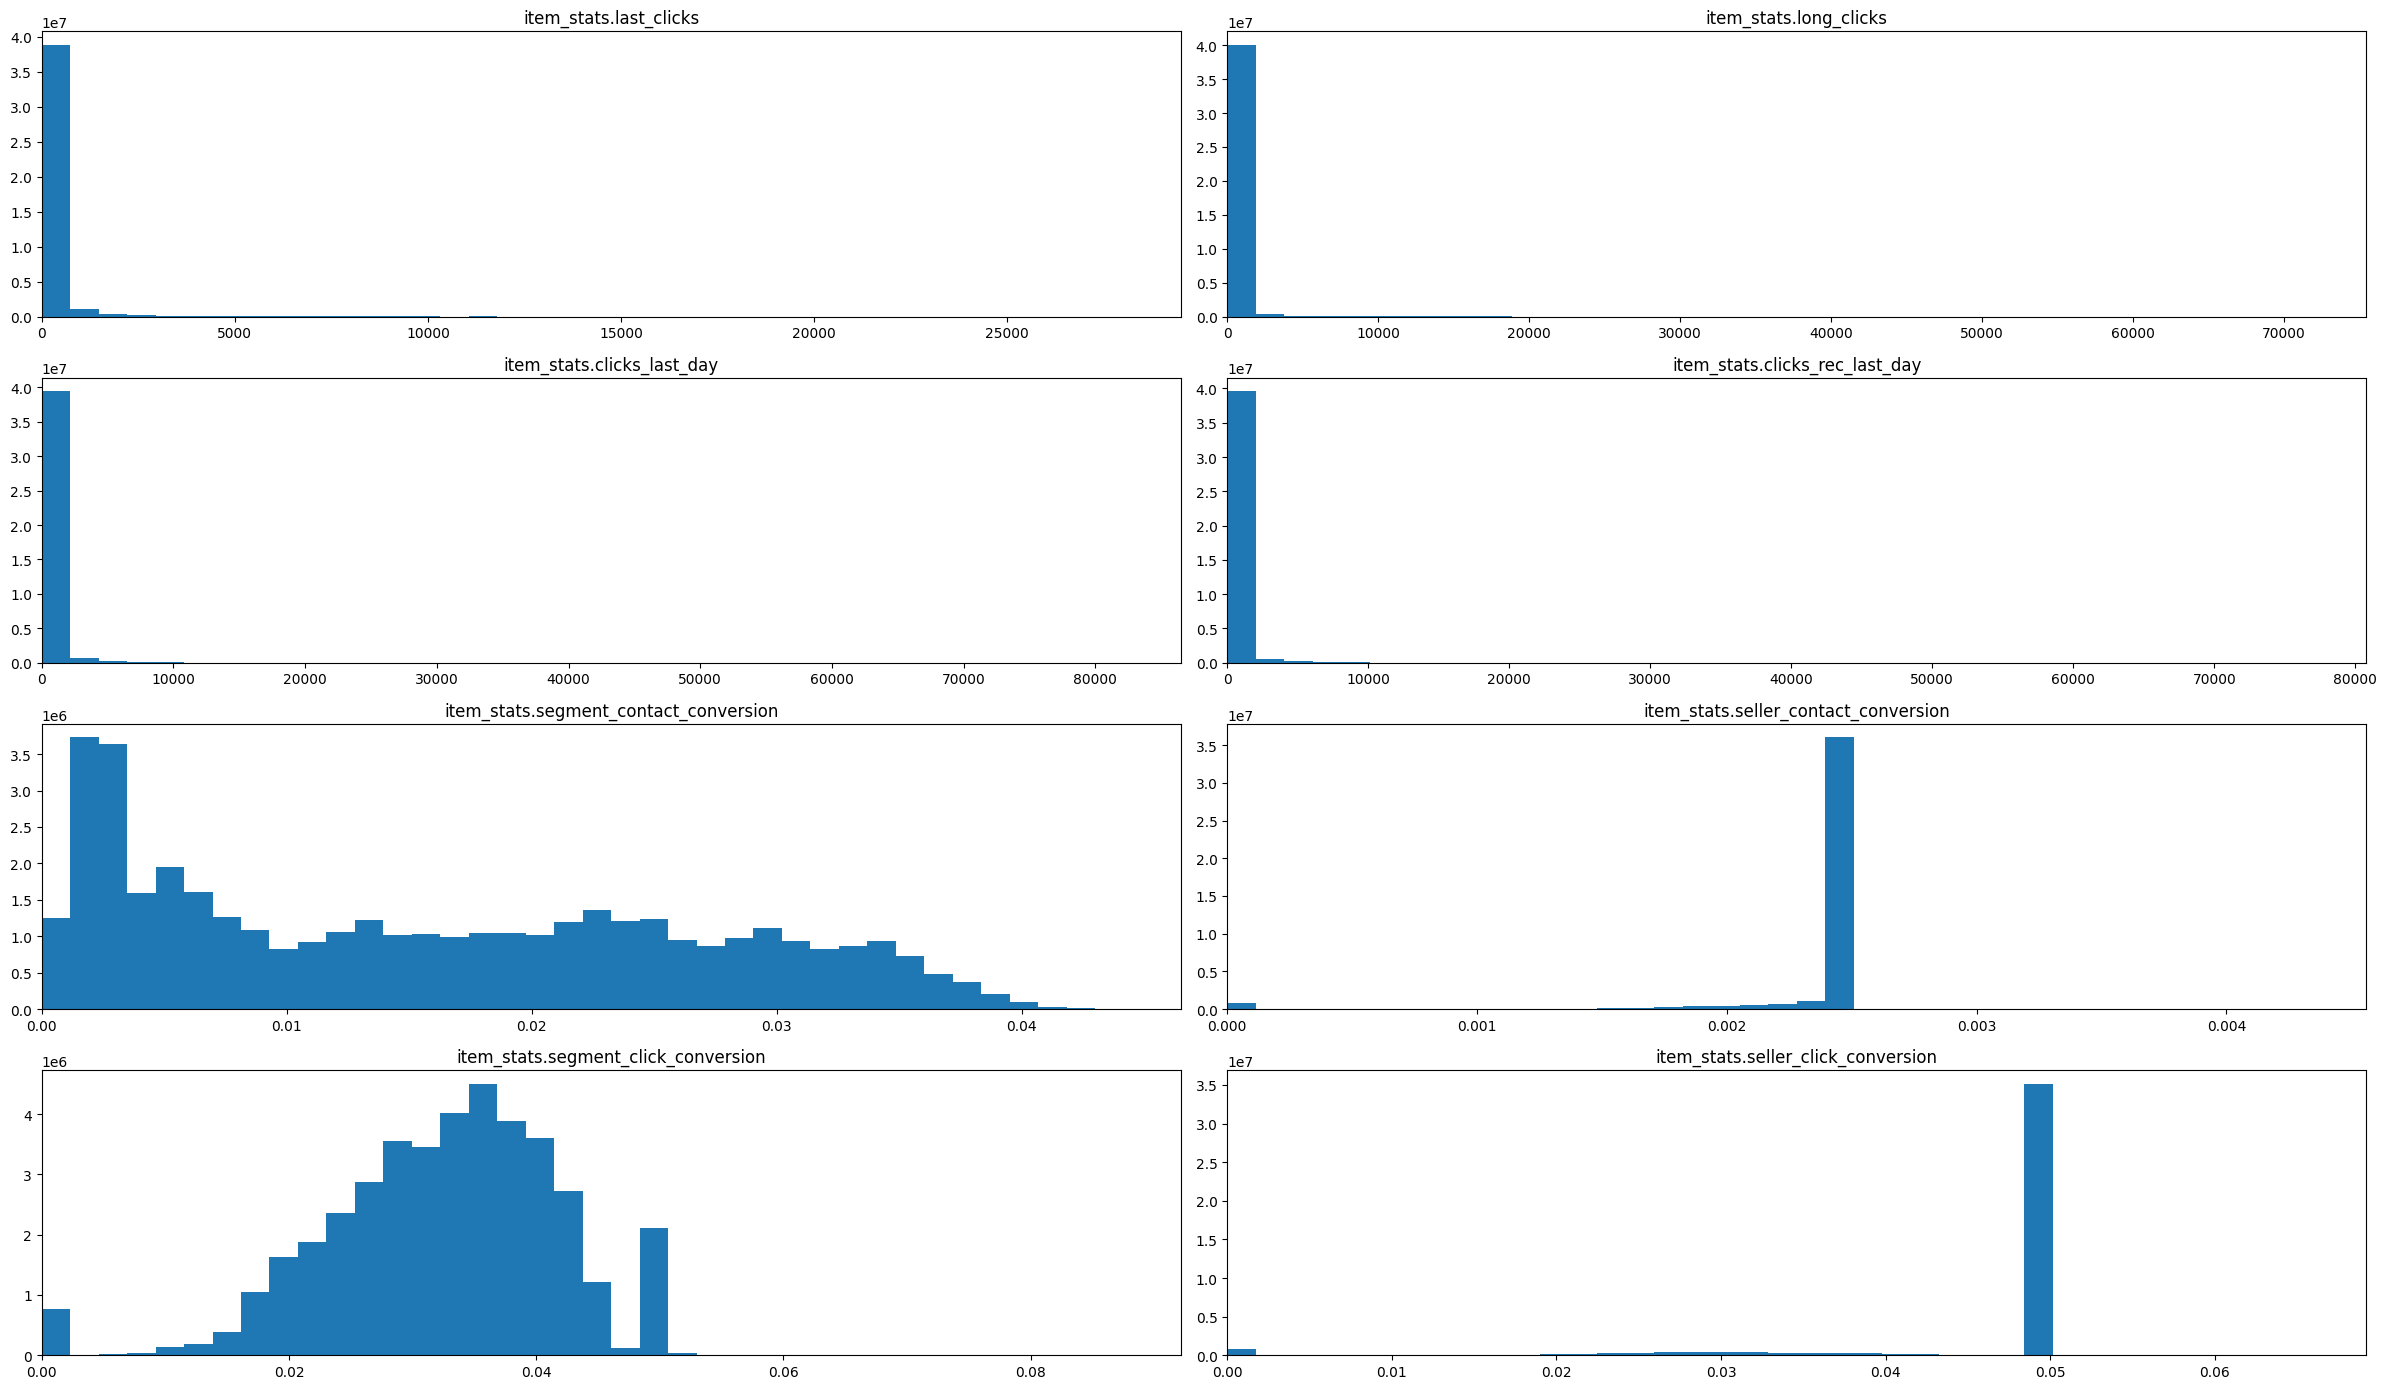

In [32]:
plt.figure(figsize=(24, 14))
for i, f in enumerate(features3):
    plt.subplot(4, 2, i + 1)
    plt.hist(train[f], bins=40)
    plt.title(f)
    plt.xlim((0, np.max(train[f])))
    
plt.tight_layout()

–ó–∞–±–∞–≤–Ω–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å, —á—Ç–æ –º—ã —Ç–∞–∫ –ø–æ–¥–µ–ª–∏–ª–∏ - –Ω–æ –∫–∞–∂–µ—Ç—Å—è —á—Ç–æ –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ 2 –≥—Ä—É–ø–ø—ã –∏ –ø–µ—Ä–≤—ã–µ 4 –∏–∑ 3 –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å

In [33]:
cols_for_delete = [
       'item_stats.shows_last_day', 'item_stats.shows_rec',
       'item_stats.shows_rec_last_day', 'item_stats.contacts',
       'item_stats.contacts_last_day', 'item_stats.contacts_rec_last_day',
       'item_stats.contacts_rec', 'item_stats.last_contacts',
       'item_stats.delayed_contacts', 'item_stats.delayed_contacts_rec',
       'item_stats.clicks', 'item_stats.clicks_rec',
       'item_stats.last_clicks', 'item_stats.long_clicks',
]

train = train.drop(columns = cols_for_delete)
train.shape

(40623600, 33)

In [34]:
train = train.drop(columns = ['item_stats.clicks_last_day', 'item_stats.clicks_rec_last_day'])
train.shape

(40623600, 31)

–ü—Ä–æ–≤–µ—Ä–∏–º –æ—Å—Ç–∞—Ç–∫–∏ –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é

<AxesSubplot: >

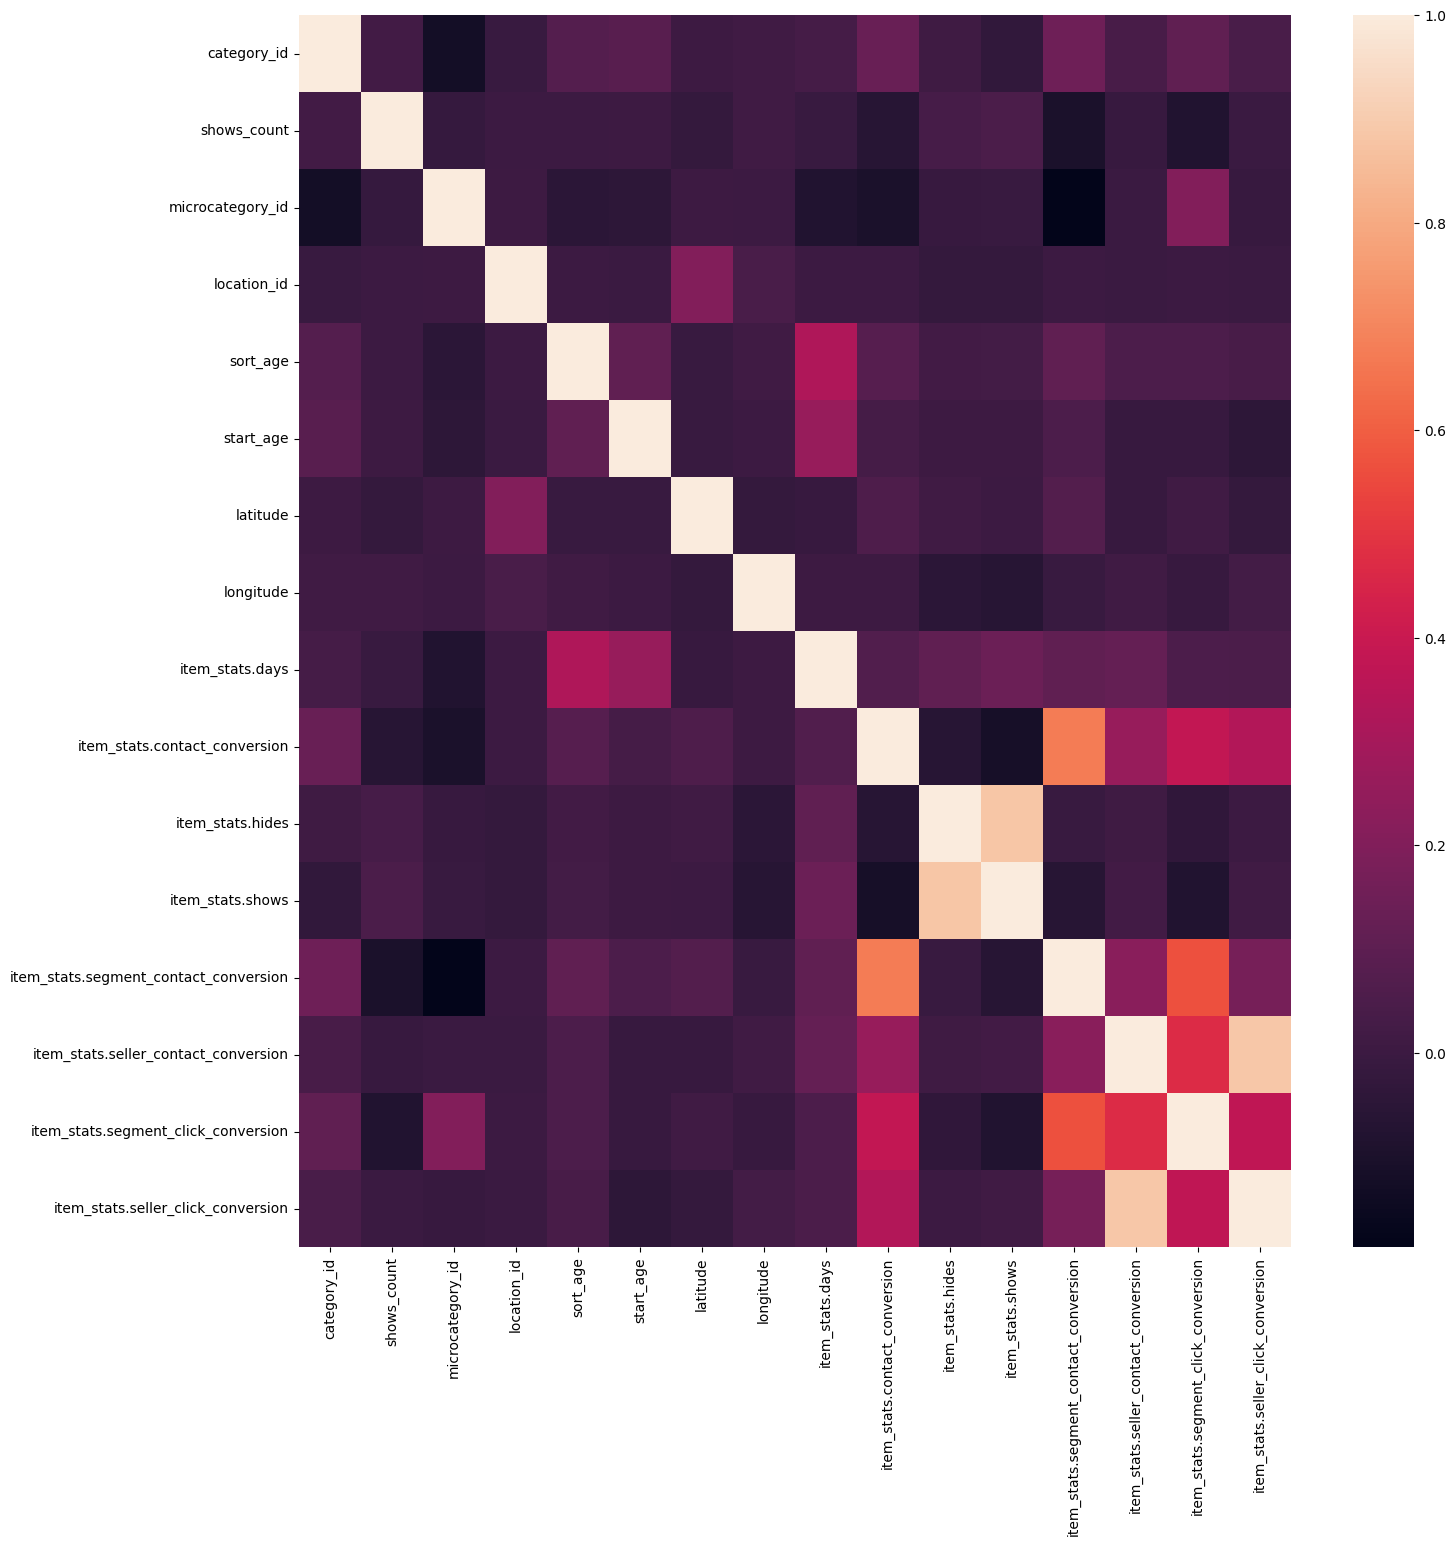

In [35]:
feats = [
       'category_id', 'shows_count', 'microcategory_id',
       'location_id', 'sort_age', 'start_age', 'latitude',
       'longitude', 'item_stats.days',
       'item_stats.contact_conversion', 'item_stats.hides', 'item_stats.shows',
        'item_stats.segment_contact_conversion',
       'item_stats.seller_contact_conversion',
       'item_stats.segment_click_conversion',
       'item_stats.seller_click_conversion',
]

plt.figure(figsize=(16, 16))
sns.heatmap(train[feats].corr())

–í–∏–¥–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é 'item_stats.hides', 'item_stats.shows' –∏  'item_stats.seller_contact_conversion' —Å 'item_stats.seller_click_conversion' . –£–¥–∞–ª—é 'item_stats.seller_contact_conversion' –∏ 'item_stats.hides' –∏–±–æ –∏—Ö —Å—Ç—Ä–æ–∫–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —á—É—Ç—å –±–æ–ª–µ–µ –≤—ã—Ä–∞–∂–µ–Ω—ã —á–µ–º —É –¥—Ä—É–≥–∏—Ö

In [36]:
train = train.drop(columns = ['item_stats.seller_contact_conversion', 'item_stats.hides'])
train.shape

(40623600, 29)

–ù–∞ —ç—Ç–æ–º –æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö —è –ø–ª–∞–Ω–∏—Ä—É—é –∑–∞–∫–æ–Ω—á–∏—Ç—å. –ü–æ—á–µ–º—É?

1) –û–±—Ä–∞–±–æ—Ç–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –Ω–µ –ø–æ—Ç—Ä–µ–±–æ–≤–∞–ª–∞—Å—å
2) –° –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –ø—Ä–æ–ø—É—Å–∫–æ–≤ - —è —Å–¥–µ–ª–∞–ª–∞ —á—Ç–æ —Å–º–æ–≥–ª–∞
3) –¢–∞–∫ –∫–∞–∫ –¥–∞—Ç–∞—Å–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø–æ–ª–Ω—ã–π (–ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –º–Ω–æ–≥–æ –±–µ—Å–ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏) —è —Å—á–∏—Ç–∞—é, —á—Ç–æ –Ω–∏–∫–∞–∫–∏—Ö –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–æ–±–∞–≤–ª—è—Ç—å –Ω–µ –Ω–∞–¥–æ
4) –û—Å—Ç–∞–≤—à–∏–µ—Å—è –±—ã–ª–∏ –∏–∑—É—á–µ–Ω—ã –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –∏ —Ä–∞–∑–ª–∏—á–Ω–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏–π

–ò—Ç–æ–≥–æ —á–µ–≥–æ —è –¥–æ–±–∏–ª–∞—Å—å –Ω–∞ —ç—Ç–æ–º —à–∞–≥–µ:
1) –£–¥–∞–ª–∏–ª–∞ –∏–∑ –¥–∞–Ω–Ω—ã—Ö 20 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - —Å–ø–∏—Å–æ–∫ –Ω–∏–∂–µ
2) –ò–∑–±–∞–≤–∏–ª–∞—Å—å —Ö–æ—Ç—å –æ—Ç –∫–∞–∫–æ–≥–æ —Ç–æ —á–∏—Å–ª–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö
3) –ê —Ç–∞–∫–∂–µ —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–£–¥–∞–ª–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
'price', 'model_b_f1',
'item_stats.shows_last_day', 'item_stats.shows_rec',
'item_stats.shows_rec_last_day', 'item_stats.contacts',
'item_stats.contacts_last_day', 'item_stats.contacts_rec_last_day',
'item_stats.contacts_rec', 'item_stats.last_contacts',
'item_stats.delayed_contacts', 'item_stats.delayed_contacts_rec',
'item_stats.clicks', 'item_stats.clicks_rec',
'item_stats.last_clicks', 'item_stats.long_clicks',
'item_stats.clicks_last_day', 'item_stats.clicks_rec_last_day',
'item_stats.seller_contact_conversion', 'item_stats.hides'



# 2. –í—ã–±–æ—Ä –º–æ–¥–µ–ª–∏

–¢–∞–∫ –∫–∞–∫ –¥–∞–Ω–Ω–∞—è –∑–∞–¥–∞—á–∞ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç —Ä–∞–±–æ—Ç—É —Å –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–æ–π –∑–Ω–∞—á–µ–Ω–∏–π –∏ —Ç–¥, –∞ —è –Ω–µ –∑–Ω–∞—é –¥—Ä—É–≥–∏—Ö –º–æ–¥–µ–ª–µ–π –∫—Ä–æ–º–µ lightgbm –∫–æ—Ç–æ—Ä—ã–µ –≤ —ç—Ç–æ —É–º–µ—é—Ç - —è —Ç–∞–∫–∂–µ –∫–∞–∫ –∏ –≤ –±–µ–π–∑–ª–∞–π–Ω–µ —Ä–µ—à–∏–ª–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å lightgbm.

–í –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å —Ö–æ—á—É –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å —Ç—É –∂–µ –º–æ–¥–µ–ª—å, —á—Ç–æ –∏ –±—ã–ª–∞ –≤ –±–µ–π–∑–ª–∞–π–Ω–µ

In [47]:
!brew install libomp

Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
autocorrect                hysteria                   pomsky
bazarr                     iir1                       postgresql@15
bdftopcf                   jj                         proxsuite
bindgen                    joker                      python-gdbm@3.11
btrfs-progs                json2tsv                   python-lsp-server
camlp-streams              kustomizer                 python-tk@3.11
cbindgen                   libdivide                  python-typing-extensions
cdsclient                  libemf2svg                 python@3.11
cloudprober                libgrapheme                quilt-installer
cmctl                      libretls                   rnr
cntb                       libunibreak                rome
corrosion                  liburing                   ruff
curlcpp                    license-eye                sambamba
dronedb                    

In [48]:
!python3 -m pip install lightgbm

In [49]:
import lightgbm
from lightgbm.callback import early_stopping

In [13]:
TARGET = 'target'
REQUEST_ID = 'request_id'

In [6]:
def df_to_dict(df: pd.DataFrame):
    return df.groupby(REQUEST_ID).item_id.apply(list).to_dict()

def mapk_df(df_with_prediction: pd.DataFrame, k: int) -> float:
    df_sorted = df_with_prediction.sort_values(['request_id', 'prediction'], ascending=[True, False])
    df_sorted['rank'] = df_sorted.groupby('request_id').cumcount()
    top = df_sorted[df_sorted['rank'] < k]
    pred_dict = df_to_dict(top)
    ans_dict = df_to_dict(df_sorted.query('target == 1'))
    
    predicted = []
    actual = []
    for k in ans_dict:
        predicted.append(pred_dict[k])
        actual.append(ans_dict[k])
        
    return mapk(actual, predicted, k)


def apk(actual, predicted, k=30):

    if not actual:
        return 0.0

    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):
        # first condition checks whether it is valid prediction
        # second condition checks if prediction is not repeated
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    return score / min(len(actual), k)

def mapk(actual, predicted, k=30):
    return sum([apk(a, p, k) for a, p in zip(actual, predicted)]) / len(actual)

In [7]:
def get_group_for_lgb(sorted_vals):
    curr_val = sorted_vals[0]
    cnt = 1
    groups = []
    for val in sorted_vals[1:]:
        if val != curr_val:
            groups.append(cnt)
            curr_val = val
            cnt = 1
        else:
            cnt += 1

    groups.append(cnt)

    return groups

In [8]:
def train_val_test_split(
        df: pd.DataFrame,
        split_column: str,
        val_part: float = 0.1,
        test_part: float = 0.1,
        seed: int = 32,
) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame):
    random.seed(seed)
    unique_values = df[split_column].unique().tolist()
    random.shuffle(unique_values)
    val_start = int(len(unique_values) * (1 - val_part - test_part))
    test_start = int(len(unique_values) * (1 - test_part))
    train_ids = unique_values[:val_start]
    val_ids = unique_values[val_start: test_start]
    test_ids = unique_values[test_start:]

    return (
        df[df[split_column].isin(train_ids)],
        df[df[split_column].isin(val_ids)],
        df[df[split_column].isin(test_ids)],
    )


In [9]:
def train_lightgbm(ranking_df: pd.DataFrame, features: list):
    train, val, test = train_val_test_split(ranking_df, REQUEST_ID, val_part=0.1, test_part=0.1)
    X_train, y_train, train_groups = train[features], train[TARGET], get_group_for_lgb(train[REQUEST_ID].values)
    X_val, y_val, val_groups = val[features], val[TARGET], get_group_for_lgb(val[REQUEST_ID].values)

    lgb_train = lightgbm.Dataset(
        X_train, y_train, categorical_feature=['category_id'],
        group=train_groups, free_raw_data=False
    )
    lgb_eval = lightgbm.Dataset(
        X_val, y_val, reference=lgb_train, categorical_feature=['category_id'],
        group=val_groups, free_raw_data=False
    )


    model = lightgbm.train(
        {'objective': 'binary', 'metric': 'map', 'eval_at': [8, 30], 'learning_rate': 0.05},
        lgb_train,
        valid_sets=[lgb_eval],
        callbacks=[
            early_stopping(50),
            lightgbm.print_evaluation(10)
        ],
    )
    
    test['prediction'] = model.predict(test[features])
    print(f'map@30 on holdout test: {mapk_df(test, 30)}')
    

    return model

In [10]:
features = [
       'category_id','model_a_score',
       'model_a_rank', 'model_b_score', 'model_b_rank',
       'model_b_f2', 'model_b_f3', 'model_c_score', 'model_c_rank',
       'model_d_score', 'model_d_rank', 'shows_count', 'microcategory_id',
       'location_id', 'sort_age', 'start_age', 'latitude',
       'longitude', 'item_stats.days',
       'item_stats.contact_conversion', 'item_stats.shows',
       'item_stats.segment_contact_conversion',
       'item_stats.segment_click_conversion',
       'item_stats.seller_click_conversion',
]

In [56]:
model = train_lightgbm(train, features)

/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.794469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.0976247	valid_0's map@30: 0.112198
[20]	valid_0's map@8: 0.102427	valid_0's map@30: 0.117462
[30]	valid_0's map@8: 0.105401	valid_0's map@30: 0.120796
[40]	valid_0's map@8: 0.106919	valid_0's map@30: 0.12246
[50]	valid_0's map@8: 0.108787	valid_0's map@30: 0.124168
[60]	valid_0's map@8: 0.110414	valid_0's map@30: 0.125821
[70]	valid_0's map@8: 0.11174	valid_0's map@30: 0.127146
[80]	valid_0's map@8: 0.112932	valid_0's map@30: 0.128435
[90]	valid_0's map@8: 0.114029	valid_0's map@30: 0.129596
[100]	valid_0's map@8: 0.115393	valid_0's map@30: 0.130942
Did not meet early stopping. Best iteration is:
[100]	valid_0's map@8: 0.115393	valid_0's map@30: 0.130942


/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_41232/3952206437.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.12534654107394147


–ß—Ç–æ —Ö–æ—á–µ—Ç—Å—è –æ—Ç–º–µ—Ç–∏—Ç—å —Å—Ä–∞–∑—É? –ß—Ç–æ —Ç–æ–ª—å–∫–æ –ø—Ä–∏ –æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö —É–¥–∞–ª–æ—Å—å —É–ª—É—á—à–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∫–æ–¥–æ–º –±–µ–π–∑–ª–∞–π–Ω–∞! –ù–æ –Ω–∞ —ç—Ç–æ–º –º—ã –æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å—Å—è –Ω–µ –±—É–¥–µ–º.

# 3. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏. –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

–¢–µ–ø–µ—Ä—å –∫–æ–≥–¥–∞ –æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã –¥–∞–Ω–Ω—ã–µ –∏ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–∞ –ø—Ä–∏–º–∏—Ç–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å - –æ—Å—Ç–∞–ª–æ—Å—å –ø–æ–¥–æ–±—Ä–∞—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã.

–Ø –±—É–¥—É —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å 'learning_rate' –∏ 'num_iterations'

–ù–∞—á–Ω–µ–º —Å lr. –ß—É—Ç–æ—á–∫—É –ø–µ—Ä–µ–ø–∏—à–µ–º –∫–æ–¥ train —á—Ç–æ–± –æ–Ω –≤–æ–∑–≤—Ä–∞—â–∞–ª –µ—â–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ holdout —Ç–µ—Å—Ç–µ - –ø–æ —ç—Ç–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –∏ –±—É–¥–µ–º –ø–æ–¥–±–∏—Ä–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã

In [15]:
def train_lightgbm_with_lr(ranking_df, features, lr):
    train, val, test = train_val_test_split(ranking_df, REQUEST_ID, val_part=0.1, test_part=0.1)
    X_train, y_train, train_groups = train[features], train[TARGET], get_group_for_lgb(train[REQUEST_ID].values)
    X_val, y_val, val_groups = val[features], val[TARGET], get_group_for_lgb(val[REQUEST_ID].values)

    lgb_train = lightgbm.Dataset(
        X_train, y_train, categorical_feature=['category_id'],
        group=train_groups, free_raw_data=False
    )
    lgb_eval = lightgbm.Dataset(
        X_val, y_val, reference=lgb_train, categorical_feature=['category_id'],
        group=val_groups, free_raw_data=False
    )


    model = lightgbm.train(
        {'objective': 'binary', 'metric': 'map', 'eval_at': [8, 30], 'learning_rate': lr},
        lgb_train,
        valid_sets=[lgb_eval],
        callbacks=[
            early_stopping(50),
            lightgbm.print_evaluation(10)
        ],
    )
    
    test['prediction'] = model.predict(test[features])
    metr = mapk_df(test, 30)
    print(f'map@30 on holdout test: {metr}')

    return metr

In [16]:
lrs = [0.01, 0.05, 0.1, 0.25, 0.5]
metrics = []

for lr in lrs:
    m = train_lightgbm_with_lr(train, features, lr)
    metrics.append(m)

/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.846396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.0895438	valid_0's map@30: 0.103977
[20]	valid_0's map@8: 0.0947769	valid_0's map@30: 0.109173
[30]	valid_0's map@8: 0.0964119	valid_0's map@30: 0.111154
[40]	valid_0's map@8: 0.0986406	valid_0's map@30: 0.113404
[50]	valid_0's map@8: 0.100024	valid_0's map@30: 0.114926
[60]	valid_0's map@8: 0.101285	valid_0's map@30: 0.116085
[70]	valid_0's map@8: 0.101889	valid_0's map@30: 0.116839
[80]	valid_0's map@8: 0.102653	valid_0's map@30: 0.117624
[90]	valid_0's map@8: 0.102835	valid_0's map@30: 0.117874
[100]	valid_0's map@8: 0.103287	valid_0's map@30: 0.11839
Did not meet early stopping. Best iteration is:
[100]	valid_0's map@8: 0.103287	valid_0's map@30: 0.11839


/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_45206/3626151032.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.1122467294557058


/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.688348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.0976247	valid_0's map@30: 0.112198
[20]	valid_0's map@8: 0.102427	valid_0's map@30: 0.117462
[30]	valid_0's map@8: 0.105401	valid_0's map@30: 0.120796
[40]	valid_0's map@8: 0.106919	valid_0's map@30: 0.12246
[50]	valid_0's map@8: 0.108787	valid_0's map@30: 0.124168
[60]	valid_0's map@8: 0.110414	valid_0's map@30: 0.125821
[70]	valid_0's map@8: 0.11174	valid_0's map@30: 0.127146
[80]	valid_0's map@8: 0.112932	valid_0's map@30: 0.128435
[90]	valid_0's map@8: 0.114029	valid_0's map@30: 0.129596
[100]	valid_0's map@8: 0.115393	valid_0's map@30: 0.130942
Did not meet early stopping. Best iteration is:
[100]	valid_0's map@8: 0.115393	valid_0's map@30: 0.130942


/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_45206/3626151032.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.12534654107394147


/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.786938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.100583	valid_0's map@30: 0.1158
[20]	valid_0's map@8: 0.105831	valid_0's map@30: 0.121122
[30]	valid_0's map@8: 0.109275	valid_0's map@30: 0.124783
[40]	valid_0's map@8: 0.112055	valid_0's map@30: 0.127566
[50]	valid_0's map@8: 0.113105	valid_0's map@30: 0.1286
[60]	valid_0's map@8: 0.114394	valid_0's map@30: 0.130008
[70]	valid_0's map@8: 0.115583	valid_0's map@30: 0.131224
[80]	valid_0's map@8: 0.116909	valid_0's map@30: 0.132509
[90]	valid_0's map@8: 0.118049	valid_0's map@30: 0.133814
[100]	valid_0's map@8: 0.11864	valid_0's map@30: 0.134361
Did not meet early stopping. Best iteration is:
[100]	valid_0's map@8: 0.11864	valid_0's map@30: 0.134361


/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_45206/3626151032.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.12864874477189603


/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.772865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.0939657	valid_0's map@30: 0.109176
[20]	valid_0's map@8: 0.101337	valid_0's map@30: 0.11726
[30]	valid_0's map@8: 0.1068	valid_0's map@30: 0.122662
[40]	valid_0's map@8: 0.109631	valid_0's map@30: 0.125609
[50]	valid_0's map@8: 0.112284	valid_0's map@30: 0.128349
[60]	valid_0's map@8: 0.113452	valid_0's map@30: 0.129605
[70]	valid_0's map@8: 0.113896	valid_0's map@30: 0.12988
[80]	valid_0's map@8: 0.113648	valid_0's map@30: 0.12985
[90]	valid_0's map@8: 0.113514	valid_0's map@30: 0.12971
[100]	valid_0's map@8: 0.1139	valid_0's map@30: 0.130062
Did not meet early stopping. Best iteration is:
[74]	valid_0's map@8: 0.114018	valid_0's map@30: 0.130059


/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_45206/3626151032.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.1235802955200662


/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.808881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.0862868	valid_0's map@30: 0.101242
[20]	valid_0's map@8: 0.0950683	valid_0's map@30: 0.1105
[30]	valid_0's map@8: 0.0990514	valid_0's map@30: 0.114716
[40]	valid_0's map@8: 0.101382	valid_0's map@30: 0.117054
[50]	valid_0's map@8: 0.103116	valid_0's map@30: 0.118935
[60]	valid_0's map@8: 0.103696	valid_0's map@30: 0.119433
[70]	valid_0's map@8: 0.103957	valid_0's map@30: 0.119734
[80]	valid_0's map@8: 0.103764	valid_0's map@30: 0.119576
[90]	valid_0's map@8: 0.104122	valid_0's map@30: 0.119837
[100]	valid_0's map@8: 0.103814	valid_0's map@30: 0.119562
Did not meet early stopping. Best iteration is:
[85]	valid_0's map@8: 0.104215	valid_0's map@30: 0.119966


/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_45206/3626151032.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.11184283439578512


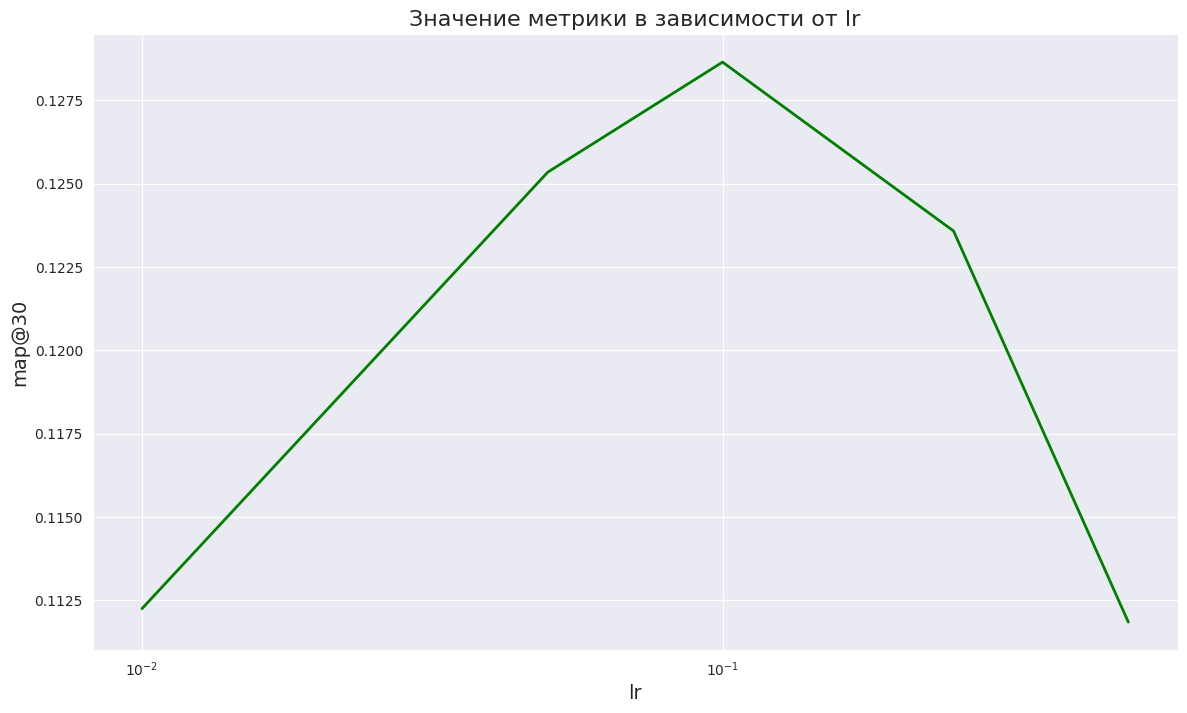

In [20]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(14, 8))
    plt.title('–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç lr', fontsize=16)
    plt.plot(lrs, metrics, c='green', lw=2)
    plt.xlabel('lr', fontsize=14)
    plt.ylabel('map@30', fontsize=14)
    plt.xscale('log')

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, –ª—É—á—à–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º —Å –æ—Ç—Ä—ã–≤–æ–º —è–≤–ª—è–µ—Ç—Å—è 0.1, –∞ –Ω–µ 0.5 –∫–∞–∫ –≤ –±–µ–π–∑–ª–∞–Ω–µ

–¢–µ–ø–µ—Ä—å –ø—Ä–æ–≤–µ–¥–µ–º –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç –¥–ª—è 'num_iterations', –ø—Ä–∏ —ç—Ç–æ–º –∑–∞—Ñ–∏–∫—Å lr

In [21]:
def train_lightgbm_with_iter(ranking_df, features, it):
    train, val, test = train_val_test_split(ranking_df, REQUEST_ID, val_part=0.1, test_part=0.1)
    X_train, y_train, train_groups = train[features], train[TARGET], get_group_for_lgb(train[REQUEST_ID].values)
    X_val, y_val, val_groups = val[features], val[TARGET], get_group_for_lgb(val[REQUEST_ID].values)

    lgb_train = lightgbm.Dataset(
        X_train, y_train, categorical_feature=['category_id'],
        group=train_groups, free_raw_data=False
    )
    lgb_eval = lightgbm.Dataset(
        X_val, y_val, reference=lgb_train, categorical_feature=['category_id'],
        group=val_groups, free_raw_data=False
    )


    model = lightgbm.train(
        {'objective': 'binary', 'metric': 'map', 'eval_at': [8, 30], 'learning_rate': 0.1, 'num_iterations': it},
        lgb_train,
        valid_sets=[lgb_eval],
        callbacks=[
            early_stopping(50),
            lightgbm.print_evaluation(10)
        ],
    )
    
    test['prediction'] = model.predict(test[features])
    metr = mapk_df(test, 30)
    print(f'map@30 on holdout test: {metr}')

    return metr

In [22]:
iterations = [50, 100, 150, 200]
metrics = []

for it in iterations:
    m = train_lightgbm_with_iter(train, features, it)
    metrics.append(m)

/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.728619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.100583	valid_0's map@30: 0.1158
[20]	valid_0's map@8: 0.105831	valid_0's map@30: 0.121122
[30]	valid_0's map@8: 0.109275	valid_0's map@30: 0.124783
[40]	valid_0's map@8: 0.112055	valid_0's map@30: 0.127566
[50]	valid_0's map@8: 0.113105	valid_0's map@30: 0.1286
Did not meet early stopping. Best iteration is:
[50]	valid_0's map@8: 0.113105	valid_0's map@30: 0.1286


/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_45206/1050639728.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.12299830351626363


/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.743518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.100583	valid_0's map@30: 0.1158
[20]	valid_0's map@8: 0.105831	valid_0's map@30: 0.121122
[30]	valid_0's map@8: 0.109275	valid_0's map@30: 0.124783
[40]	valid_0's map@8: 0.112055	valid_0's map@30: 0.127566
[50]	valid_0's map@8: 0.113105	valid_0's map@30: 0.1286
[60]	valid_0's map@8: 0.114394	valid_0's map@30: 0.130008
[70]	valid_0's map@8: 0.115583	valid_0's map@30: 0.131224
[80]	valid_0's map@8: 0.116909	valid_0's map@30: 0.132509
[90]	valid_0's map@8: 0.118049	valid_0's map@30: 0.133814
[100]	valid_0's map@8: 0.11864	valid_0's map@30: 0.134361
Did not meet early stopping. Best iteration is:
[100]	valid_0's map@8: 0.11864	valid_0's map@30: 0.134361


/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_45206/1050639728.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.12864874477189603


/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.790144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.100583	valid_0's map@30: 0.1158
[20]	valid_0's map@8: 0.105831	valid_0's map@30: 0.121122
[30]	valid_0's map@8: 0.109275	valid_0's map@30: 0.124783
[40]	valid_0's map@8: 0.112055	valid_0's map@30: 0.127566
[50]	valid_0's map@8: 0.113105	valid_0's map@30: 0.1286
[60]	valid_0's map@8: 0.114394	valid_0's map@30: 0.130008
[70]	valid_0's map@8: 0.115583	valid_0's map@30: 0.131224
[80]	valid_0's map@8: 0.116909	valid_0's map@30: 0.132509
[90]	valid_0's map@8: 0.118049	valid_0's map@30: 0.133814
[100]	valid_0's map@8: 0.11864	valid_0's map@30: 0.134361
[110]	valid_0's map@8: 0.11883	valid_0's map@30: 0.13473
[120]	valid_0's map@8: 0.119509	valid_0's map@30: 0.135504
[130]	valid_0's map@8: 0.119538	valid_0's map@30: 0.13

/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_45206/1050639728.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.12939831741239075


/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.936144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.100583	valid_0's map@30: 0.1158
[20]	valid_0's map@8: 0.105831	valid_0's map@30: 0.121122
[30]	valid_0's map@8: 0.109275	valid_0's map@30: 0.124783
[40]	valid_0's map@8: 0.112055	valid_0's map@30: 0.127566
[50]	valid_0's map@8: 0.113105	valid_0's map@30: 0.1286
[60]	valid_0's map@8: 0.114394	valid_0's map@30: 0.130008
[70]	valid_0's map@8: 0.115583	valid_0's map@30: 0.131224
[80]	valid_0's map@8: 0.116909	valid_0's map@30: 0.132509
[90]	valid_0's map@8: 0.118049	valid_0's map@30: 0.133814
[100]	valid_0's map@8: 0.11864	valid_0's map@30: 0.134361
[110]	valid_0's map@8: 0.11883	valid_0's map@30: 0.13473
[120]	valid_0's map@8: 0.119509	valid_0's map@30: 0.135504
[130]	valid_0's map@8: 0.119538	valid_0's map@30: 0.13

/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_45206/1050639728.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.12939831741239075


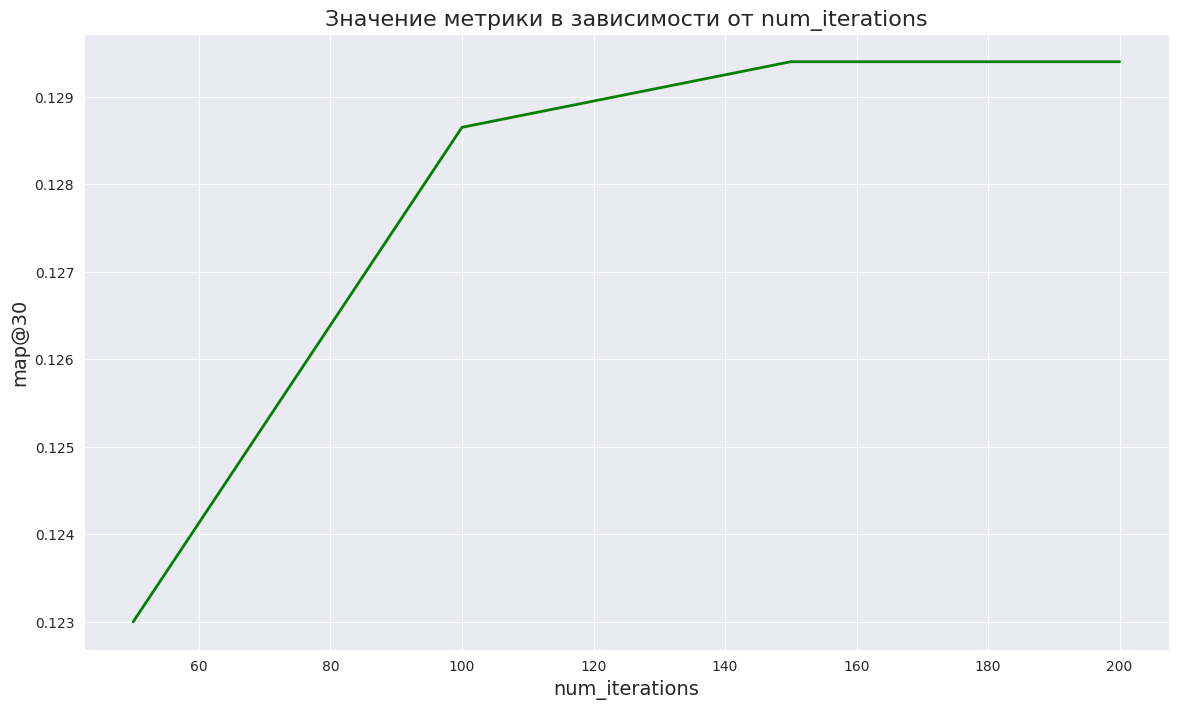

In [23]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(14, 8))
    plt.title('–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç num_iterations', fontsize=16)
    plt.plot(iterations, metrics, c='green', lw=2)
    plt.xlabel('num_iterations', fontsize=14)
    plt.ylabel('map@30', fontsize=14)

–ü–æ–ª—É—á–∞–µ—Ç—Å—è, –º—ã –µ—â–µ —Å–º–æ–≥–ª–∏ —É–ª—É—á—à–∏—Ç—å –º–µ—Ç—Ä–∏–∫—É, –æ–¥–Ω–∞–∫–æ –±–æ–ª–µ–µ —á–µ–º 150 –Ω–µ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª–∞ –∑–∞–¥–∞–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –∏–±–æ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è —É—Å–ª–æ–≤–∏–µ —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏ –Ω–∞ 147 –∏—Ç–µ—Ä–∞—Ü–∏–∏

–î—É–º–∞—é —á—Ç–æ —Ç–µ–ø–µ—Ä–± —É–∂–µ –º—ã –≥–æ—Ç–æ–≤—ã –∑–∞—Å—ã–ª–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ –≤ –∫–æ–Ω—Ç–µ—Å—Ç

# 4. –†–µ—à–µ–Ω–∏–µ.

In [24]:
def train_lightgbm(ranking_df: pd.DataFrame, features: list):
    train, val, test = train_val_test_split(ranking_df, REQUEST_ID, val_part=0.1, test_part=0.1)
    X_train, y_train, train_groups = train[features], train[TARGET], get_group_for_lgb(train[REQUEST_ID].values)
    X_val, y_val, val_groups = val[features], val[TARGET], get_group_for_lgb(val[REQUEST_ID].values)

    lgb_train = lightgbm.Dataset(
        X_train, y_train, categorical_feature=['category_id'],
        group=train_groups, free_raw_data=False
    )
    lgb_eval = lightgbm.Dataset(
        X_val, y_val, reference=lgb_train, categorical_feature=['category_id'],
        group=val_groups, free_raw_data=False
    )


    model = lightgbm.train(
        {'objective': 'binary', 'metric': 'map', 'eval_at': [8, 30], 'learning_rate': 0.1, 'num_iterations': 150},
        lgb_train,
        valid_sets=[lgb_eval],
        callbacks=[
            early_stopping(50),
            lightgbm.print_evaluation(10)
        ],
    )
    
    test['prediction'] = model.predict(test[features])
    print(f'map@30 on holdout test: {mapk_df(test, 30)}')

    return model

In [25]:
model = train_lightgbm(train, features)

/usr/local/lib/python3.10/site-packages/lightgbm/callback.py:57: UserWarning: 'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. Use 'log_evaluation()' callback instead.
  _log_warning("'print_evaluation()' callback is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 176182, number of negative: 32322518
[LightGBM] [Info] Total groups: 108329, total data: 32498700
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.003626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4868
[LightGBM] [Info] Number of data points in the train set: 32498700, number of used features: 24


/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Total groups: 13541, total data: 4062300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005421 -> initscore=-5.212002
[LightGBM] [Info] Start training from score -5.212002
Training until validation scores don't improve for 50 rounds
[10]	valid_0's map@8: 0.100583	valid_0's map@30: 0.1158
[20]	valid_0's map@8: 0.105831	valid_0's map@30: 0.121122
[30]	valid_0's map@8: 0.109275	valid_0's map@30: 0.124783
[40]	valid_0's map@8: 0.112055	valid_0's map@30: 0.127566
[50]	valid_0's map@8: 0.113105	valid_0's map@30: 0.1286
[60]	valid_0's map@8: 0.114394	valid_0's map@30: 0.130008
[70]	valid_0's map@8: 0.115583	valid_0's map@30: 0.131224
[80]	valid_0's map@8: 0.116909	valid_0's map@30: 0.132509
[90]	valid_0's map@8: 0.118049	valid_0's map@30: 0.133814
[100]	valid_0's map@8: 0.11864	valid_0's map@30: 0.134361
[110]	valid_0's map@8: 0.11883	valid_0's map@30: 0.13473
[120]	valid_0's map@8: 0.119509	valid_0's map@30: 0.135504
[130]	valid_0's map@8: 0.119538	valid_0's map@30: 0.13

/var/folders/x3/9026029j76l2gjgxkhc_6n_9md408r/T/ipykernel_45206/1028597987.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(test[features])


map@30 on holdout test: 0.12939831741239075


In [26]:
del train

In [27]:
model.save_model('lgbm_train.txt')

In [28]:
# load from model:
model = lightgbm.Booster(model_file='lgbm_train.txt')

In [29]:
test = pd.read_parquet('Downloads/items_test.pq')

In [30]:
def create_submission(filename, model, test, k: int = 30):
    test['pred'] = model.predict(test[model.feature_name()])
    test_sorted = test.sort_values(['request_id', 'pred'], ascending=[True, False])
    test_sorted['rank'] = test_sorted.groupby('request_id').cumcount()
    top = test_sorted[test_sorted['rank'] < k]
    subm = top[['request_id', 'item_id']].groupby('request_id')['item_id'].apply(lambda x: ' '.join(map(str, x)))
    subm_df = subm.to_frame().reset_index().rename(columns={'item_id': 'item_ids'})
    subm_df.to_csv(filename, index=False)

In [31]:
create_submission('lgbm.csv', model, test)